# Essential Matplotlib Plots

For this activity, you will be using an abalone dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/abalone). Abalone are shelled marine animals raised and harvested for food.  This data set describes a little over 4000 abalone collected in Tasmania.  Their physical characteristics have been measured, a process which is described in the link above as "a boring and time-consuming task".  Although we will just be visualizing the data, note that the recommended machine learning application for this data set is "predicting the age of abalone from physical measurements."

In [100]:
# Run cell without changes
import pandas as pd
import matplotlib.pyplot as plt

abalone = pd.read_csv('data/abalone.data', header=None)

abalone.columns = ["sex", "length", "diameter", "height", "whole",
                   "shucked", "viscera", "shell", "rings"]

abalone = abalone.to_dict(orient='list')

# Task 1

Create a scatterplot that visualizes the correlation between abalone `length` and `diameter`.  Title the plot with a string that includes a short description of the correlation.  Add axis labels.  Color the markers green. 

Make sure to use fig, ax plt.subplots() syntax. 
Order the plot so that the highest value count is first on the x_axis.

Text(0, 0.5, 'Diameter')

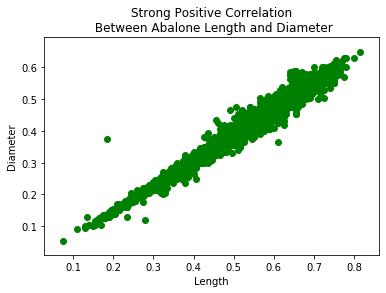

In [101]:
#__SOLUTION__
fig, ax = plt.subplots()

ax.scatter(abalone['length'], abalone['diameter'], c='g')
ax.set_title('Strong Positive Correlation\n Between Abalone Length and Diameter')
ax.set_xlabel('Length')
ax.set_ylabel('Diameter')

# Task 2

Create a barplot that visualizes the number of instances of each category of abalone `sex`. There are three categories: male, female, and infant. 

There are many ways to do this, but try to do it using a for loop.  

Eventually, numpy and pandas will make this very easy.  If you want, look up how you might use `numpy.unique()` or by converting the lists to a pandas `series` and using the `value_counts` method.


In [79]:
# Your code here

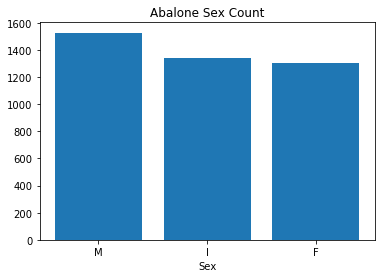

In [80]:
#__SOLUTION__

sex_counts = {'M':0, 'F':0, 'I':0}

for sex in abalone['sex']:
    if sex == 'M':
        sex_counts['M'] += 1
    elif sex == 'F':
        sex_counts['F'] += 1
    else:
        sex_counts['I'] += 1
        
# Sort values so that plot is descending
sex_counts = {k:v for k,v in sorted(sex_counts.items(), 
                                    key=lambda x: x[1], reverse=True)}
        
fig, ax = plt.subplots()

ax.bar(sex_counts.keys(), sex_counts.values())

ax.set_title('Abalone Sex Count')
ax.set_xlabel('Sex');

M    1528
I    1342
F    1307
dtype: int64


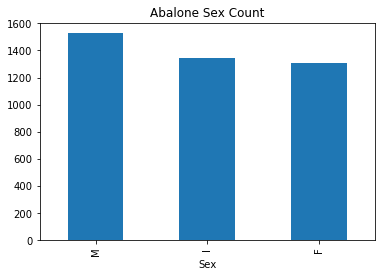

In [89]:
#__SOLUTION__
import pandas as pd
# Alternate answer using pandas series

sex_counts = pd.Series(abalone['sex']).value_counts()
print(sex_counts)

fig, ax = plt.subplots()

sex_counts.plot(kind='bar', ax=ax)

ax.set_title('Abalone Sex Count')
ax.set_xlabel('Sex');

# Task 3


Create a single plot which layers histograms on top of eachother. Create three subsets of abalone `length`, each representing a different sex.  In order to do this, you will need to iterate over two lists (`length` and `sex`) in the abalone dictionary at the same time.  Use the `zip` built in operator to do that, and use if/else logic to populate lists representing each sex.

Then plot the distributions of each sex group's `length` feature using ax.hist.  

To make the plot look better, add a label to each plot that indicates male, female, or infant.  Set the `alpha` level of the top two plots to `.5` to make them semitransparent and `bins=20`.  Call legend() off of the ax object to show the legend aligned to the label.  Give the plot a title and labels.


<details>
    <summary>
        Starter Code to help creating the length lists
    </summary>

```python
# Create empty lists to hold length of each sex
abalone_male_length = []
abalone_infant_length = []
abalone_female_length = []

# Populate lists with lengths
for sex, length in zip(abalone['sex'], abalone['length']):
    if sex == fill_in:
        pass
    elif sex == fill_in:
        pass
    else:
        pass
```

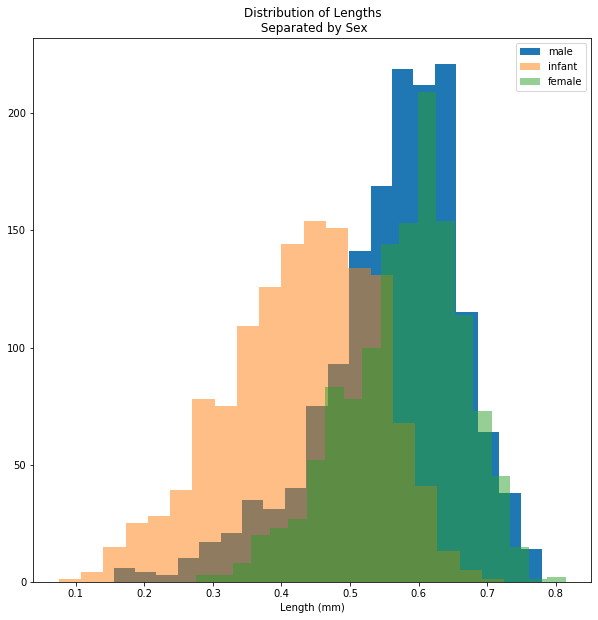

In [99]:
#__SOLUTION__

# Create empty lists to hold length of each sex
abalone_male_length = []
abalone_infant_length = []
abalone_female_length = []

# Populate lists with lengths
for sex, length in zip(abalone['sex'], abalone['length']):
    if sex == 'M':
        abalone_male_length.append(length)
    elif sex == 'F':
        abalone_female_length.append(length)
    else:
        abalone_infant_length.append(length)
        
fig, ax = plt.subplots(figsize=(10,10))

# Layer histograms to display whether they are from 
ax.hist(abalone_male_length, bins=20, label='male')
ax.hist(abalone_infant_length, bins=20, alpha=.5, label='infant')
ax.hist(abalone_female_length, bins=20, alpha=.5, label='female')

ax.set_title('Distribution of Lengths\n Separated by Sex')
ax.set_xlabel('Length (mm)')
ax.legend();
        

# Task 4

For the final task, create a single figure with two plots.  The figure should have 2 rows and 1 column, which you specify with the first two arguments of the subplots() method. Go ahead and make the figure bigger (10,10) using the `figsize` argument.  In row 1, plot a **histogram** of the `height` variable. In row 2, plot a **boxplot** of the `height` variable. 

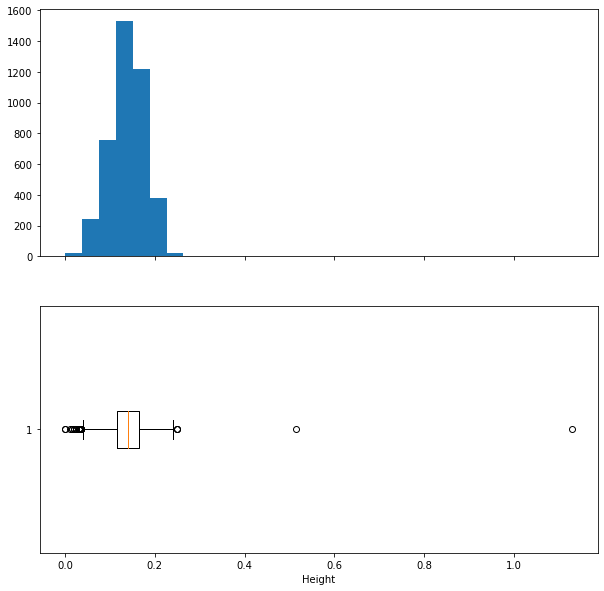

In [48]:
#__SOLUTION__

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10), sharex=True)
ax1.hist(abalone['height'],bins=30)
ax2.boxplot(abalone['height'], vert=False, showfliers=True)
ax2.set_xlabel('Height', );